# Supermarket Data Analysis

In this project, we'll be performing some exploratory data analysis on the sample supermarket data.

# Project objectives

The following are the project objectives-

Performing EDA on the data to derive insights on how the profits can be increased.

Discovering the weak areas of the sales deparment in order to improve the sales.

Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers.

# import  libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('SampleSuperstore1.csv')
df_1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df_1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Checking the Data

Here we will check if there is any issue with the data such as missing values. We shall also check the various data types of the entries.

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


As we can see, features such as sales,quantity, discount and profits are either int or float. This makes sense since these are all numerical entries. Rest are objects which are mainly names of cities or categories of sold items. There is no requirement of data wrangling to be done since our dataframe is completely pre-processed. We can directly move ahead with the data visualisation section now.

In [5]:
df_1.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

Here we can see, no null values in the data, so we can proceed further for EDA (Explonatory Data Analysis)

# Data Visualization

# popular shipping modes

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

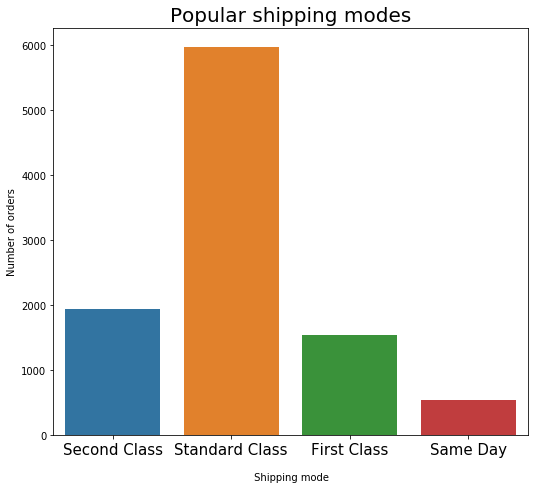

In [6]:

plt.figure(figsize=(8.5,7.5))
sns.countplot('Ship Mode',data=df_1)

plt.title('Popular shipping modes',size=20)
plt.xlabel('\n Shipping mode',size=10)
plt.ylabel('Number of orders',size=10)
plt.xticks(fontsize=15)


As we can see, the standard class shipping has the most count which means the customers have opted for this type of sipping mode the most. This is because Standard class delivery will cost less compared to the the premium for same day delivery is much higher. Hence, customers choosing same day delivery is the least.

# Shipping modes of each segment

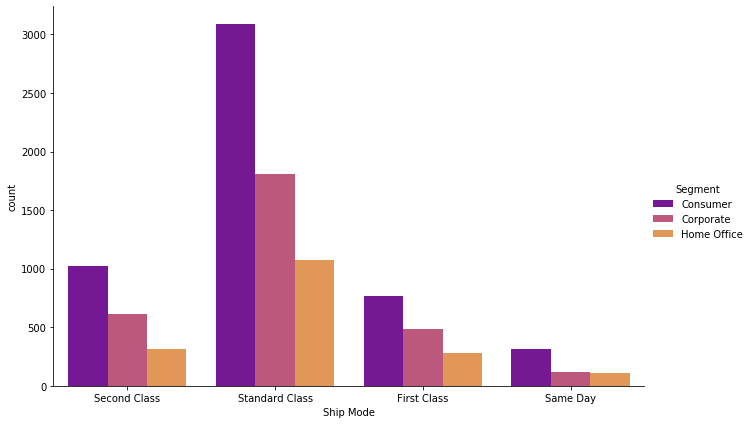

In [7]:
sns.catplot('Ship Mode',data=df_1,hue='Segment',kind='count',palette='plasma',aspect=1.5,height=6)

Here we see that maximum number of consumers opt for standard class delivery as we saw in the above countplot too. However, it is also intersting to note that highest number of orders for same day delivery are also from consumers although in lower numbers.

The reason could be because individual consumers will always be of greater number when compared to number of corporates or home offices.

# Quantities ordered

In [8]:
df_group = df_1.groupby('Segment')['Quantity'].sum().reset_index()

In [9]:
df_group

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


Text(0.5, 1.0, 'Quantities ordered by each segment')

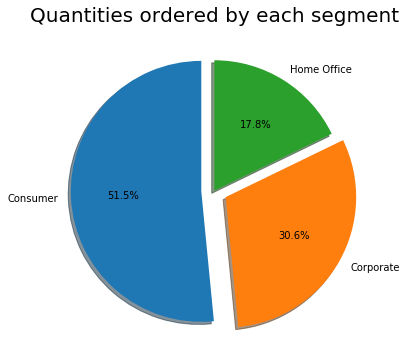

In [10]:
labels = df_1['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0),shadow=True,startangle=90)
plt.title('Quantities ordered by each segment',size=20)

# Quantities ordered by each state

Next, let us check which states and cities have the highest orders.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

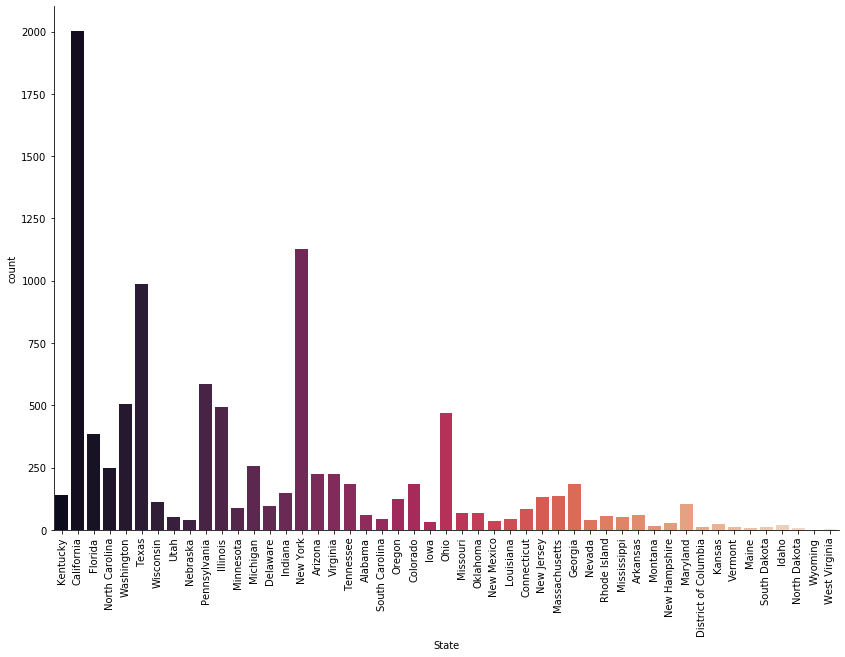

In [11]:
sns.catplot('State',kind='count',data=df_1,palette='rocket',height=8,aspect=1.5)
plt.xticks(rotation=90)

Let us now check the top 10 cities with highest number of orders by quantities.

In [12]:
df_top10 = df_1.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
df_top10

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
...,...,...
213,Iowa City,1
386,Port Orange,1
257,Lindenhurst,1
259,Littleton,1


# Top 10 cities with highest quantities ordered

In [13]:
df_top10 = df_top10.head(10)
df_top10.reset_index(drop=True,inplace=True)
df_top10

,City,Quantity
0,New York City,3417
1,Los Angeles,2879
2,Philadelphia,1981
3,San Francisco,1935
4,Seattle,1590
5,Houston,1466
6,Chicago,1132
7,Columbus,836
8,San Diego,670
9,Springfield,649


Text(0.5, 6.799999999999997, 'City')

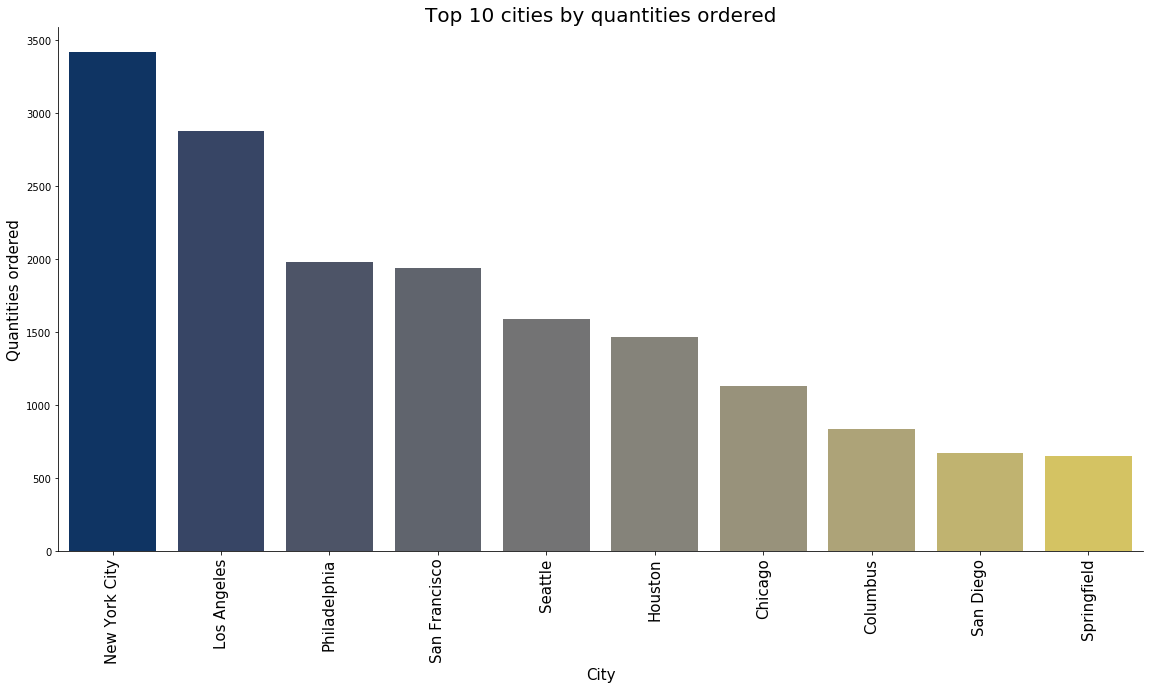

In [14]:
sns.catplot('City','Quantity',data=df_top10,kind='bar',height=8,aspect=2,palette='cividis')
plt.xticks(size=15,rotation=90)
plt.title('Top 10 cities by quantities ordered',size=20)
plt.ylabel('Quantities ordered',size=15)
plt.xlabel('City',size=15)

Let us now check which regions have ordered the most number of quantities. This will help us understand where we must focus to improve our sales.

In [15]:
df_region=df_1.groupby('Region')['Quantity'].sum().reset_index()
df_region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


# Quantities ordered region wise

Text(0.5, 1.0, 'Quantities ordered by each region')

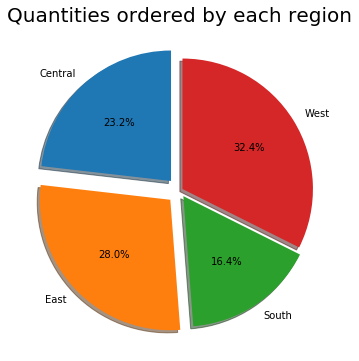

In [16]:
labels = df_region['Region'].unique()
plt.figure(figsize=(8,6))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.1,0.05,0.025),startangle=90)
plt.title('Quantities ordered by each region',size=20)

The south region is least quantities sold. Western region sales have the highest.

# Most selling categories

In [17]:
df_cats = df_1.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distribution of products sold')

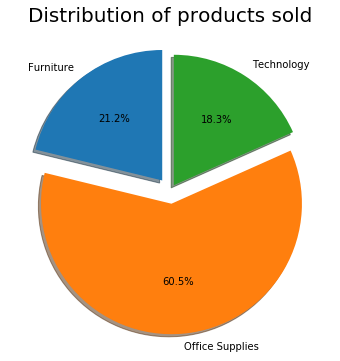

In [18]:
plt.figure(figsize=(8,6))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.1,0.05),startangle=90)

plt.title('Distribution of products sold',size=20)

As we can see, about 60.5 % sales are from office supplies followed by Furniture with 21.2 % and Technology products with 18.3 %.

# Profitable Categories

In [19]:
df_profit = df_1.groupby('Category')['Profit'].sum().reset_index()
df_profit

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

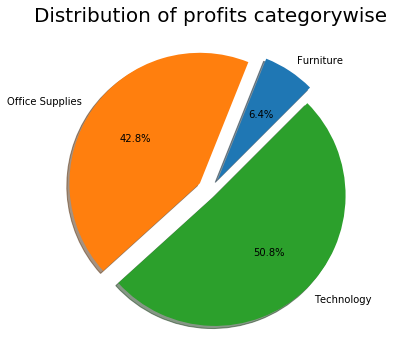

In [20]:
plt.figure(figsize=(8,6))
labels=df_profit['Category'].unique()
plt.pie(df_profit['Profit'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.1,0.1,0.05),startangle=45)

plt.title('Distribution of profits categorywise',size=20)

From the given data, the profits made on technology item and office supplies are 50.8 % and 42.8 % respectively. Profits of furniture are a meagre 6.4 %

# Top 10 profitable selling items

In [21]:
df_top10_items = df_1.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df_top10_items.reset_index(drop=True,inplace=True)

df_top10_items=df_top10_items.head(10)
df_top10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


Text(0.5, 6.799999999999997, 'Products')

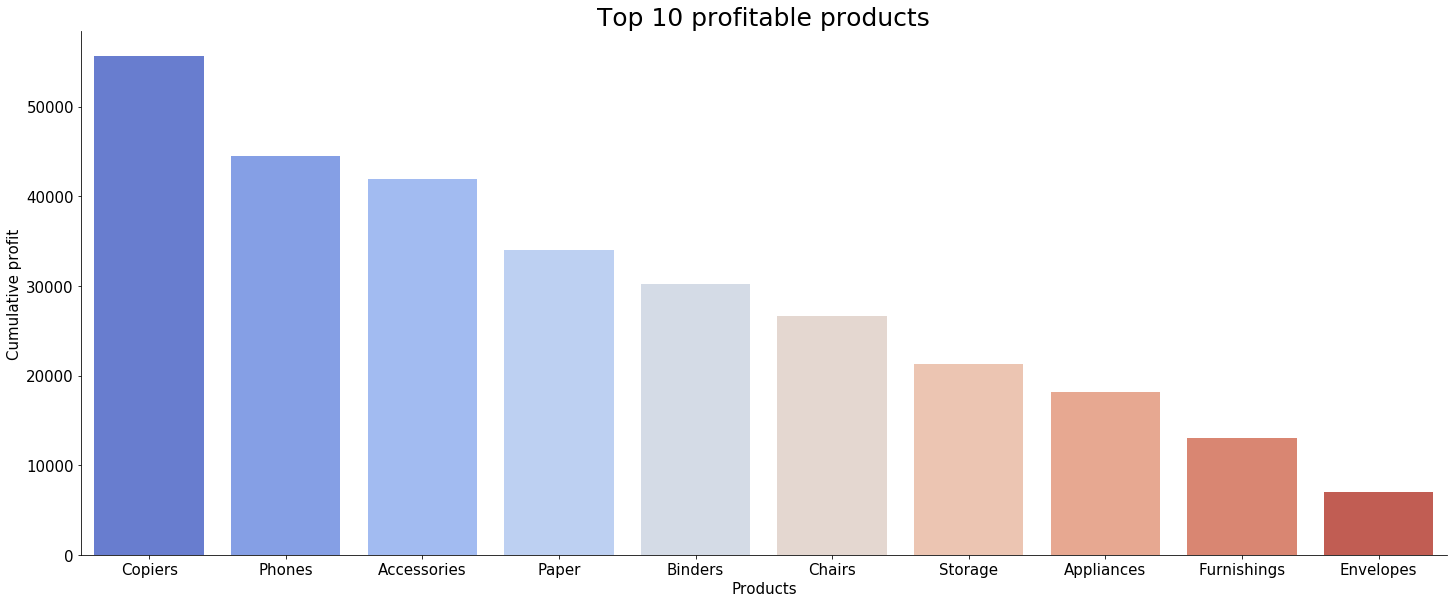

In [22]:
sns.catplot('Sub-Category','Profit',data=df_top10_items,kind='bar',aspect=2.5,height=8,palette='coolwarm')
plt.title('Top 10 profitable products',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=15)
plt.xlabel('Products',size=15)

# Top profitable cities

In [23]:
df_top10_cities = df_1.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

df_top10_cities = df_top10_cities.head(10)
df_top10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


Text(0.5, 6.799999999999997, 'City')

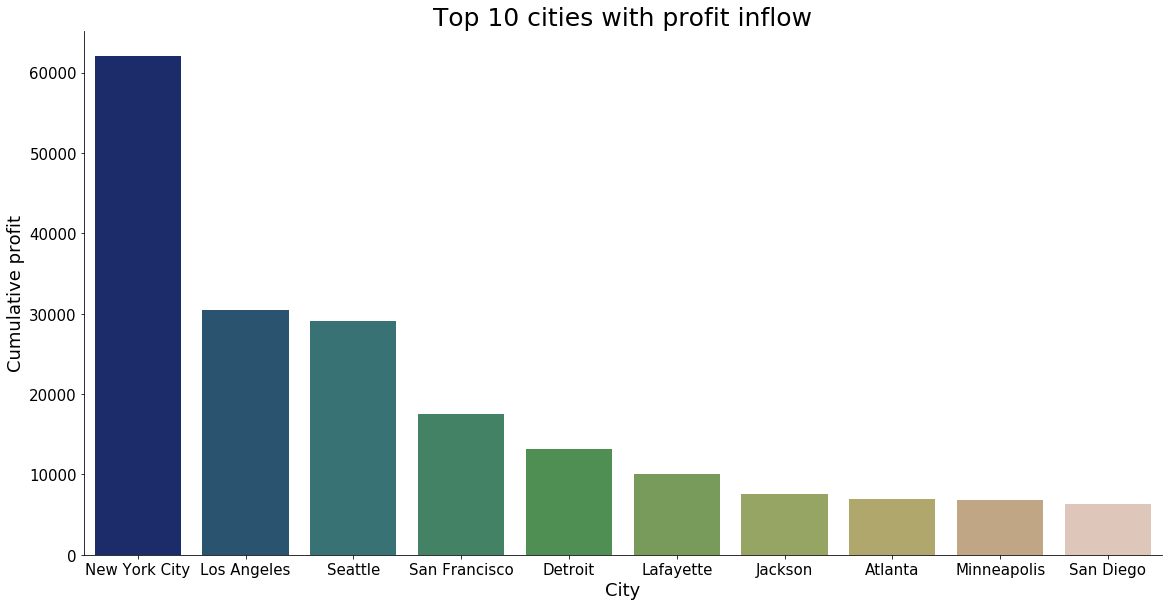

In [24]:

sns.catplot('City','Profit',data=df_top10_cities,kind='bar',aspect=2,height=8,palette='gist_earth')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)

NYC provides the highest profits followed by LA and Seattle. This is probably because a lot of large scale corporate offices are located in NY.